In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_theme()
sns.set(font_scale = 1.2)

# Reading Data

In [2]:
data_df = pd.DataFrame(columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write"])

for f in glob.glob("results/experiment1_*"):
    temp_df = pd.read_csv(f)
    data_df = data_df.append(temp_df, ignore_index=True)

data_df["latency"] = data_df["latency"]  * 1000

data_df["Node"] = "None"
data_df["Node"] = data_df["on_leader"].apply(lambda x: "Leader" if x else "Follower")
data_df = data_df.rename(columns={"n_nodes": "Nodes", "operation": "Operation"})
data_df["Type"] = data_df["order_on_write"].apply(lambda x: "Benchmark" if x else "MangoDB")

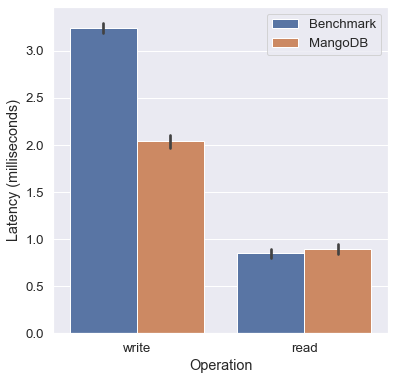

In [3]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(x="Operation", y="latency", hue="order_on_write", hue_order=[True, False], data=data_df)
ax.set(xlabel='Operation', ylabel='Latency (milliseconds)')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Benchmark', 'MangoDB'])
plt.savefig("results/exp_1_barplot.png", bbox_inches='tight', dpi=300)

<Figure size 576x576 with 0 Axes>

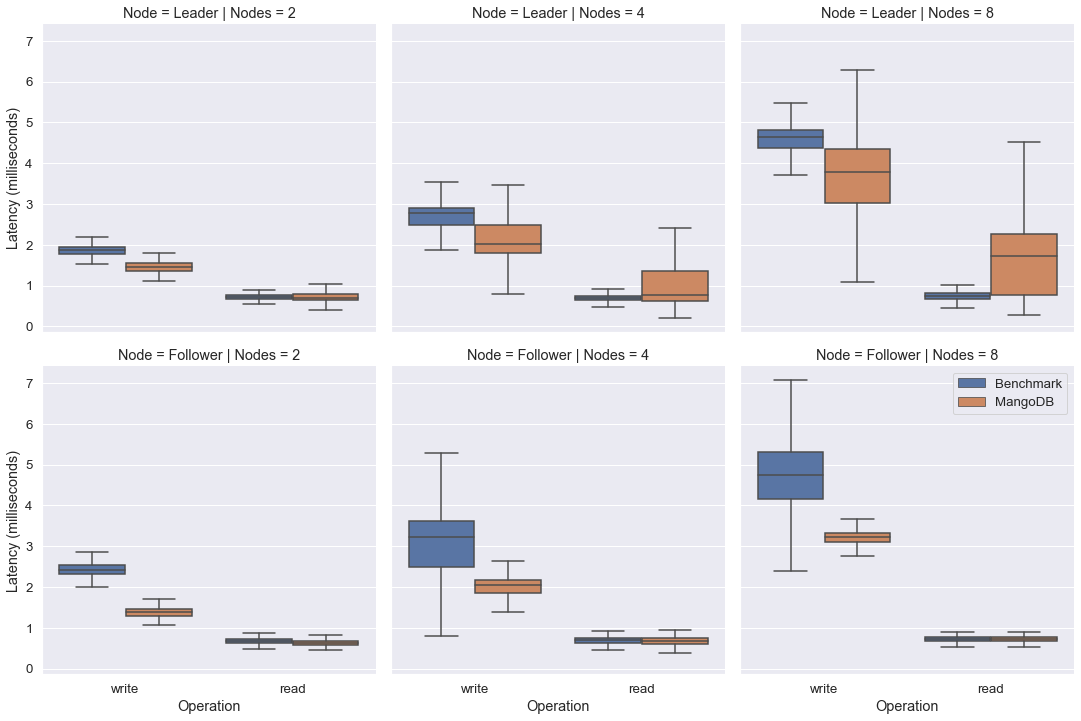

In [4]:
plt.figure(figsize=(8, 8))
ax = sns.catplot(kind="box", x="Operation", y="latency", hue="Type", hue_order=["Benchmark", "MangoDB"], col="Nodes", row="Node", data=data_df, showfliers=False, legend=False)
ax.set_ylabels("Latency (milliseconds)")
ax.set_xlabels("Operation")
plt.legend(loc='upper right')
plt.savefig("results/exp_1_on_leader.png", bbox_inches='tight', dpi=300)